In [11]:
import numpy as np
import matplotlib.pyplot as plt
import statistics

## Generate and plot Carrier Signal
Chose Tb = 10^-6 means toc do truyen 1 bit = 10^-6s 

generate and plot carrier signal co T = 10^-6s ung voi toc do truyen 1 bit
+ co tan so f thuc te = f0*1/1Tb = 10MHz

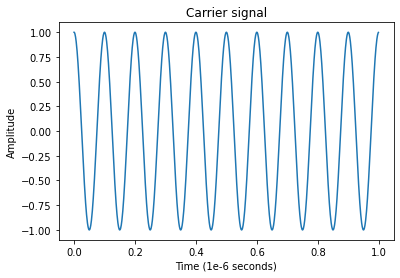

In [56]:
fs = 1000 # sample rate, fs*10^6 Hz -> plot signal
T = 1 # duration, 10^-6 seconds
t = np.linspace(0, T, int(fs*T), endpoint=False) # time axis
f0 = 10 # frequency,  10^6 Hz
carrier = np.cos(2*np.pi*f0*t)
# plt.figure(figsize=(18, 4))
plt.plot(t, carrier)
plt.title("Carrier signal")

plt.xlabel("Time (1e-6 seconds)")
plt.ylabel("Amplitude")
plt.show()


## Generate and plot Binary Data Sequence

In [57]:
def plotBinarySequence(x):
    N=len(x)
    t = np.arange(N + 1)
    y = np.zeros(N + 1)
    for i in range(N):
        if x[i] == 1:
            y[i] = 1

    y[N] = y[N-1]

    plt.step(t, y, where='post')
    plt.xlabel('Time (1e-6 seconds)')
    plt.ylabel('Value')
    plt.title('Digital Input Signal')
    plt.grid()
    plt.xlim(0, N)
    plt.ylim(-0.5, 1.5)
    plt.show()

Enter the binary data sequence: 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0


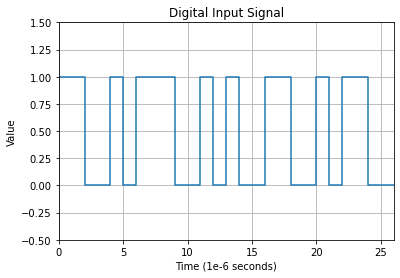

In [73]:
#input data from keyboard
binary_sequence = input("Enter the binary data sequence: ").split()
binary_sequence = [int(i) for i in binary_sequence]
N = len(binary_sequence)
plotBinarySequence(binary_sequence)


## 2-ASK Modulation

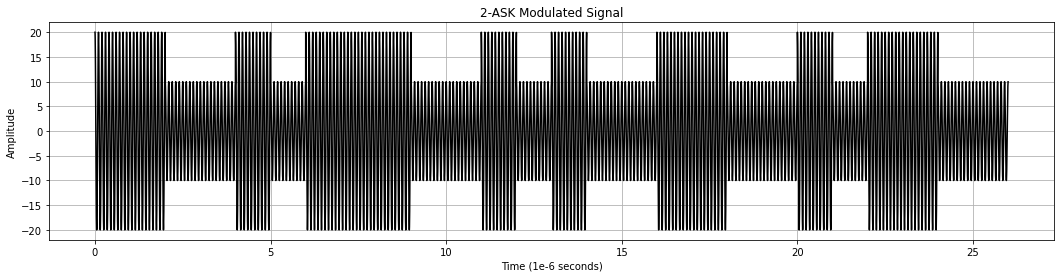

In [74]:
A0 = 10;     # Carrier amplitude for binary input '0'
A1 = 20;     # Carrier amplitude for binary input '1'

t = np.linspace(0, N, int(fs*N), endpoint=False)
modulated_signal = np.zeros(int(fs*N))

for i in range(len(binary_sequence)):
    if binary_sequence[i] == 0:
        modulated_signal[i*fs:(i+1)*fs] = A0*carrier 
    else:
        modulated_signal[i*fs:(i+1)*fs] = A1*carrier
        
# plot modulatied signal
plt.figure(figsize=(18, 4))
plt.plot(t, modulated_signal, '-', color='black', markersize=10)
plt.title("2-ASK Modulated Signal")
plt.xlabel("Time (1e-6 seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


## Demodulation

In [75]:
binary_sequence_recovered = np.zeros(N)
decision_variables = np.zeros(N)
t = np.linspace(0, T, int(fs*T), endpoint=False) # time axis
Tb=1

In [76]:
# Correlate modulated signal with carrier signal to generate decision variables
for i in range(N):
    correlation = np.trapz(t,modulated_signal[i*fs:(i+1)*fs]*carrier)            #Convolution 
    decision_variables[i]=round((correlation/Tb))
threshold = np.mean(decision_variables)             #adaptive threshold
for i in range(N):
    if decision_variables[i] >= threshold:
        binary_sequence_recovered[i] = 1
    else:
        binary_sequence_recovered[i] = 0

# Compare original and recovered binary sequences
print("Original Binary Sequence: ", binary_sequence)
print("Recovered Binary Sequence: ", binary_sequence_recovered)

Original Binary Sequence:  [1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0]
Recovered Binary Sequence:  [1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 0. 0.]


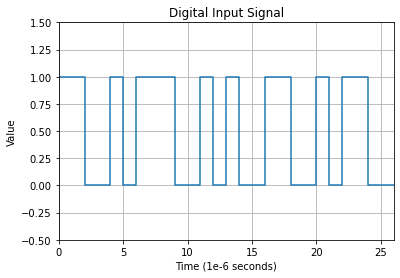

In [77]:
plotBinarySequence(binary_sequence_recovered)

## Implement with noise

In [78]:
import math
N0=10

In [79]:
def generate_gaussian_noise(size):
    return np.random.normal(0, math.sqrt(N0/2), size)

In [80]:
noise = generate_gaussian_noise(N*fs)
#generate Gaussian noise with mean 0, standard deviation sqrt(N0/2), and size = N*fs

In [81]:
receive = modulated_signal + noise

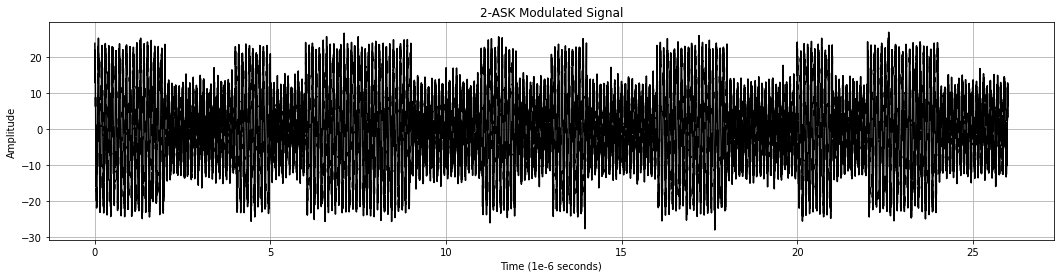

In [82]:
t = np.linspace(0, N, int(fs*N), endpoint=False)
# plot receive signal
plt.figure(figsize=(18, 4))
plt.plot(t, receive, '-', color='black', markersize=10)
plt.title("2-ASK Modulated Signal")
plt.xlabel("Time (1e-6 seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

### Demodulation with noise

In [83]:
binary_sequence_recovered = np.zeros(N)
decision_variables = np.zeros(N)
Tb=1
t = np.linspace(0, Tb, int(fs*Tb), endpoint=False)

In [84]:
# Correlate modulated signal with carrier signal to generate decision variables
for i in range(N):
    correlation = np.trapz(t,receive[i*fs:(i+1)*fs]*carrier)            #Convolution 
    decision_variables[i]=round((correlation/Tb)) #threshold
threshold = statistics.mean(decision_variables)
for i in range(N):
    if decision_variables[i] >= threshold:
        binary_sequence_recovered[i] = 1
    else:
        binary_sequence_recovered[i] = 0

# Compare original and recovered binary sequences
print("Original Binary Sequence: ", binary_sequence)
print("Recovered Binary Sequence: ", binary_sequence_recovered)


Original Binary Sequence:  [1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0]
Recovered Binary Sequence:  [1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 0. 0.]


In [85]:
print("Bit error at:")
for i in range(0, N):
    if binary_sequence[i] != binary_sequence_recovered[i]:
        print(i + 1)

Bit error at:
9
11
12


In [86]:
error_count = np.sum(np.abs(binary_sequence[i] - binary_sequence_recovered[i]) for i in range(N))
error_probability = error_count / N
print('Error probability:', error_probability)

Error probability: 0.11538461538461539


C:\Users\Admin\AppData\Local\Temp/ipykernel_17324/4134338528.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  error_count = np.sum(np.abs(binary_sequence[i] - binary_sequence_recovered[i]) for i in range(N))


In [87]:
print(1/2 * math.erfc(5*math.sqrt(10**-6 /2)))

0.49800529690925915
